# USA Census shapefile tests (in R) #

The object here is to see if we can download and use census shapefiles.

* First, let's install the tigris libraries and load them up. Then have commented out code to do a quick plot of the states to see if things are working as they should be.  Look up the codes for a county next.

* Then we'll learn how to extract some census tracts and plot these, along with the test location

* Finally, we will run a couple of tests to see if we can correctly identify whether the test location is inside the test regions.


In [14]:
#devtools::install_github('walkerke/tigris')
library(tigris)
library(magrittr)
#states() %>% plot()
lookup_code("Colorado", "Boulder County")

[1] "The code for Colorado is '08' and the code for Boulder County is '013'."

Now that we have the appropriate state and county codes, we can fetch the data by supplying the state FIPS code for Colorado and an appropriate vector of county codes. We also can supply the argument (was formerly called "detailed") cb = FALSE to return a simplified (and faster to download) dataset which is suitable for mapping.

Census Tracts are small, relatively
permanent statistical subdivisions of a county or equivalent entity that are updated by local participants
prior to each decennial census as part of the Census Bureau’s Participant Statistical Areas
Program. The Census Bureau delineates census tracts in situations where no local participant existed
or where state, local, or tribal governments declined to participate. The primary purpose of
census tracts is to provide a stable set of geographic units for the presentation of statistical data.

Census tracts generally have a population size between 1,200 and 8,000 people, with an optimum
size of 4,000 people. A census tract usually covers a contiguous area; however, the spatial size
of census tracts varies widely depending on the density of settlement.Census tract boundaries are
delineated with the intention of being maintained over a long time so that statistical comparisons
can be made from census to census. Census tracts occasionally are split due to population growth
or merged as a result of substantial population decline.

Census tract boundaries generally follow visible and identifiable features. They may follow nonvisible
legal boundaries, such as minor civil division (MCD) or incorporated place boundaries in
some states and situations, to allow for census-tract-to-governmental-unit relationships where the
governmental boundaries tend to remain unchanged between censuses. State and county boundaries
always are census tract boundaries in the standard census geographic hierarchy.

In [15]:
dfw <- tracts(state = '08', county = c('013'), cb = FALSE)

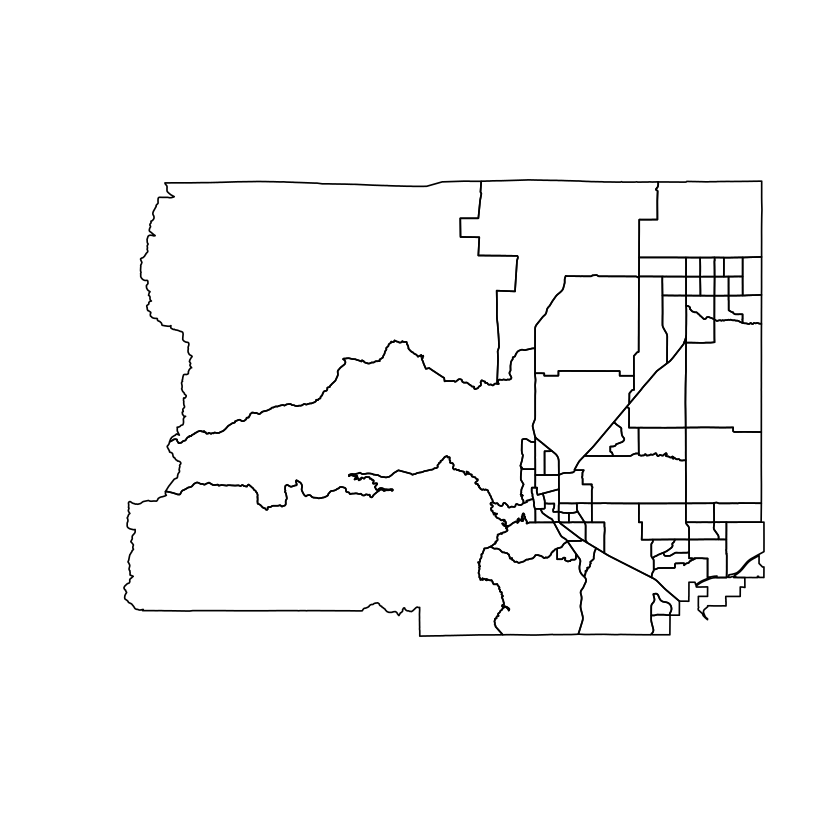

In [16]:
plot(dfw)

Tried to install extra software from https://github.com/ellisonbg/ipyleaflet to run leaflet in Jupyter, but it was not needed.  The following works OK.

In [17]:
library(leaflet)
require(maptools)
test_latitude <- 39.9205775
test_longitude <- -105.1634785
m <- leaflet(dfw) %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  addMarkers(lng=test_longitude, lat=test_latitude, popup="Test Location") %>%
  addPolygons(weight = 1)
tf = 'myfigure.html'
htmlwidgets::saveWidget(m, file = tf, selfcontained = F)
IRdisplay::display_html(paste("<iframe src=' ", tf, " ' ","/>"))

In [18]:
head(fips_codes)
str(fips_codes)

,state,state_code,state_name,county_code,county
1,AL,01,Alabama,001,Autauga County
2,AL,01,Alabama,003,Baldwin County
3,AL,01,Alabama,005,Barbour County
4,AL,01,Alabama,007,Bibb County
5,AL,01,Alabama,009,Blount County
6,AL,01,Alabama,011,Bullock County


'data.frame':	3235 obs. of  5 variables:
 $ state      : chr  "AL" "AL" "AL" "AL" ...
 $ state_code : chr  "01" "01" "01" "01" ...
 $ state_name : chr  "Alabama" "Alabama" "Alabama" "Alabama" ...
 $ county_code: chr  "001" "003" "005" "007" ...
 $ county     : chr  "Autauga County" "Baldwin County" "Barbour County" "Bibb County" ...


In [19]:
head(dfw)

An object of class "SpatialPolygonsDataFrame"
Slot "data":
   STATEFP COUNTYFP TRACTCE       GEOID   NAME            NAMELSAD MTFCC
70      08      013  013503 08013013503 135.03 Census Tract 135.03 G5020
76      08      013  012102 08013012102 121.02 Census Tract 121.02 G5020
77      08      013  012104 08013012104 121.04 Census Tract 121.04 G5020
78      08      013  012105 08013012105 121.05 Census Tract 121.05 G5020
79      08      013  012101 08013012101 121.01 Census Tract 121.01 G5020
81      08      013  012202 08013012202 122.02 Census Tract 122.02 G5020
   FUNCSTAT   ALAND AWATER    INTPTLAT     INTPTLON
70        S 1950396      0 +40.1812420 -105.0953408
76        S 2882031      0 +40.0299035 -105.2706095
77        S 2700872  96592 +40.0507733 -105.2869740
78        S 2475518    470 +40.0502082 -105.2772891
79        S 2860008      0 +40.0296852 -105.2895546
81        S 1644044      0 +40.0179390 -105.2646140

Slot "polygons":
[[1]]
An object of class "Polygons"
Slot "Polygo

In [20]:
#080130614001017
test_region <- dfw[dfw@data$GEOID == '08013061400',]
str(test_region)

Formal class 'SpatialPolygonsDataFrame' [package "sp"] with 5 slots
  ..@ data       :'data.frame':	1 obs. of  12 variables:
  .. ..$ STATEFP : chr "08"
  .. ..$ COUNTYFP: chr "013"
  .. ..$ TRACTCE : chr "061400"
  .. ..$ GEOID   : chr "08013061400"
  .. ..$ NAME    : chr "614"
  .. ..$ NAMELSAD: chr "Census Tract 614"
  .. ..$ MTFCC   : chr "G5020"
  .. ..$ FUNCSTAT: chr "S"
  .. ..$ ALAND   : num 2579580
  .. ..$ AWATER  : num 8890
  .. ..$ INTPTLAT: chr "+39.9209698"
  .. ..$ INTPTLON: chr "-105.1567997"
  ..@ polygons   :List of 1
  .. ..$ :Formal class 'Polygons' [package "sp"] with 5 slots
  .. .. .. ..@ Polygons :List of 1
  .. .. .. .. ..$ :Formal class 'Polygon' [package "sp"] with 5 slots
  .. .. .. .. .. .. ..@ labpt  : num [1:2] -105.2 39.9
  .. .. .. .. .. .. ..@ area   : num 0.000273
  .. .. .. .. .. .. ..@ hole   : logi FALSE
  .. .. .. .. .. .. ..@ ringDir: int 1
  .. .. .. .. .. .. ..@ coords : num [1:114, 1:2] -105 -105 -105 -105 -105 ...
  .. .. .. ..@ plotOrder: in

In [21]:
m <- leaflet(test_region) %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  addMarkers(lng=test_longitude, lat=test_latitude, popup="Test Location") %>%
  addPolygons(weight=1)
tf = 'myfigure.html'
htmlwidgets::saveWidget(m, file = tf, selfcontained = F)
IRdisplay::display_html(paste("<iframe src=' ", tf, " ' ","/>"))

## Test to see if the test location is inside the selected region ##

### Valid case ###

If it is, then we will see TRUE printed below 

In [22]:
library(rgeos)
library(sp)
library(rgdal)

In [23]:
point <- data.frame(lon=test_longitude, lat=test_latitude)
sp2   <- SpatialPoints(point,proj4string=CRS(proj4string(test_region)))
gContains(test_region,sp2)

[1] TRUE

### Invalid case ###

In [24]:
test_region <- dfw[dfw@data$GEOID == '08013012105',]
m <- leaflet(test_region) %>%
  addTiles() %>%  # Add default OpenStreetMap map tiles
  addMarkers(lng=test_longitude, lat=test_latitude, popup="Test Location") %>%
  addPolygons(weight=1)
tf = 'myfigure.html'
htmlwidgets::saveWidget(m, file = tf, selfcontained = F)
IRdisplay::display_html(paste("<iframe src=' ", tf, " ' ","/>"))
point <- data.frame(lon=test_longitude, lat=test_latitude)
sp2   <- SpatialPoints(point,proj4string=CRS(proj4string(test_region)))
gContains(test_region,sp2)

[1] FALSE

OK, we are able to test correctly if a region falls within a given shapefile.

## Additional Tests with the Tigris Library ##

In [25]:
#places("Maine")
list_counties("Colorado")

,county,county_code
1,Adams,001
2,Alamosa,003
3,Arapahoe,005
4,Archuleta,007
5,Baca,009
6,Bent,011
7,Boulder,013
8,Broomfield,014
9,Chaffee,015
10,Cheyenne,017


In [26]:
print(dfw$GEOID)

 [1] "08013013503" "08013012102" "08013012104" "08013012105" "08013012101"
 [6] "08013012202" "08013012204" "08013012300" "08013012203" "08013012505"
[11] "08013012507" "08013012501" "08013012701" "08013012603" "08013012511"
[16] "08013012509" "08013012508" "08013012903" "08013012705" "08013012708"
[21] "08013012709" "08013012905" "08013012907" "08013012904" "08013013003"
[26] "08013060900" "08013013004" "08013013207" "08013013005" "08013013205"
[31] "08013013006" "08013013202" "08013012510" "08013012401" "08013013305"
[36] "08013013307" "08013013302" "08013013210" "08013013211" "08013013308"
[41] "08013013208" "08013013401" "08013013402" "08013013701" "08013012103"
[46] "08013013702" "08013012710" "08013012707" "08013012201" "08013013201"
[51] "08013013601" "08013012800" "08013060700" "08013013602" "08013013306"
[56] "08013012605" "08013060600" "08013013213" "08013060800" "08013012607"
[61] "08013013505" "08013012608" "08013013506" "08013061400" "08013013508"
[66] "08013013507" "08013